In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

all_df = pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_speak_eval_22june/adaptive_speak_eval_all_v15.csv', on_bad_lines='skip')
print('target domain   :', all_df['target domain'].unique())
print('listener domain :', all_df['listener domain'].unique())
print('simulator domain:', all_df['simulator domain'].unique())

df = pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_speak_eval_22june/adaptive_speak_eval_food_v2.csv')
print('target domain   :', df['target domain'].unique())
print('listener domain :', df['listener domain'].unique())
print('simulator domain:', df['simulator domain'].unique())

In [2]:
df = pd.concat([
    pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_test_4july/adaptive_speak_test_out_domain_appliances.csv', error_bad_lines=False, warn_bad_lines=True),
    pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_test_4july/adaptive_speak_test_out_domain_food.csv', error_bad_lines=False, warn_bad_lines=True),
    pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_test_4july/adaptive_speak_test_out_domain_indoor.csv', error_bad_lines=False, warn_bad_lines=True),
    pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_test_4july/adaptive_speak_test_out_domain_outdoor.csv', error_bad_lines=False, warn_bad_lines=True),
    pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_test_4july/adaptive_speak_test_out_domain_vehicles.csv', error_bad_lines=False, warn_bad_lines=True)
])

# pd.to_numeric(df['target domain'], errors='coerce')

print('target domain   :', df['target domain'].unique())
print('listener domain :', df['listener domain'].unique())
print('simulator domain:', df['simulator domain'].unique())
df = df.dropna()
print('Data points:', len(df))

df.head(5)

/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_7636/2089314111.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_test_4july/adaptive_speak_test_out_domain_appliances.csv', error_bad_lines=False, warn_bad_lines=True),
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_7636/2089314111.py:2: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pd.read_csv('/Users/mario/code/pb_speaker_adaptation/src/analysis/adaptive_test_4july/adaptive_speak_test_out_domain_appliances.csv', error_bad_lines=False, warn_bad_lines=True),
b'Skipping line 938: expected 88 fields, saw 104\nSkipping line 6163: expected 88 fields, saw 448\n'
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_7636/2089314111.py:3: FutureWarning: Th

target domain   : ['vehicles' 'outdoor' 'indoor' 'food' 'appliances']
listener domain : ['food' 'vehicles' 'appliances' 'indoor' 'outdoor' 'all']
simulator domain: ['food' 'vehicles' 'appliances' 'indoor' 'outdoor' 'all']
Data points: 18115


,Unnamed: 0,target domain,listener domain,simulator domain,target img idx,img path #0,img path #1,img path #2,img path #3,img path #4,...,adapted_acc_s0,adapted_acc_s1,adapted_acc_s2,adapted_acc_s3,adapted_acc_s4,adapted_acc_s5,adapted_acc_s6,adapted_acc_s7,adapted_acc_s8,adapted_acc_s9
1,1,vehicles,food,food,3,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,vehicles,food,food,4,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,vehicles,food,food,3,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,vehicles,food,food,2,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,vehicles,food,food,5,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,/home/brandizzi/pb_speaker_adaptation/dataset/...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
N_STEPS = 10
print('Representations')
for n in range(N_STEPS):
    print(f's{n}:', len(df[df['original h0'] != df[f'adapted h0 s{n}']]), '/', len(df))

print('Utterances')
for n in range(N_STEPS):
    print(f's{n}:', len(df[df['original utt'] != df[f'adapted utt s{n}']]), '/', len(df))
    if n > 0:
        print(f's{n-1} -> s{n}:', len(df[df[f'adapted utt s{n}'] != df[f'adapted utt s{n-1}']]))
    else:
        print(f'orig -> s{n}:', len(df[df[f'adapted utt s{n}'] != df['original utt']]))

Representations
s0: 18115 / 18115
s1: 18115 / 18115
s2: 18115 / 18115
s3: 18115 / 18115
s4: 18115 / 18115
s5: 18115 / 18115
s6: 18115 / 18115
s7: 18115 / 18115
s8: 18115 / 18115
s9: 18115 / 18115
Utterances
s0: 18087 / 18115
orig -> s0: 18087
s1: 18082 / 18115
s0 -> s1: 18087
s2: 18093 / 18115
s1 -> s2: 18090
s3: 18086 / 18115
s2 -> s3: 18095
s4: 18091 / 18115
s3 -> s4: 18098
s5: 18086 / 18115
s4 -> s5: 18101
s6: 18092 / 18115
s5 -> s6: 18090
s7: 18082 / 18115
s6 -> s7: 18097
s8: 18083 / 18115
s7 -> s8: 18092
s9: 18089 / 18115
s8 -> s9: 18097


## Diagnostic classification

In [4]:
CLF_TYPE = 'logistic'


In [5]:
def train_and_classify(X, Y, classifier_type='LR'):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=1)
    # print(f'X_train: {X_train.shape}  X_test: {X_test.shape}  Y_train: {Y_train.shape}  Y_test: {Y_test.shape}')

    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    if classifier_type == 'MLP':
        clf = MLPClassifier(random_state=1, max_iter=10000).fit(X_train_scaled, Y_train)
    elif classifier_type == 'logistic':
        clf = LogisticRegression(random_state=1, max_iter=10000).fit(X_train_scaled, Y_train)
    # elif classifier_type == 'linear':
    #     clf = LinearRegression().fit(X_train_scaled, Y_train)
    else:
        raise ValueError()

    Y_pred = clf.predict(X_test_scaled)

    return classification_report(Y_test, Y_pred)

### Predict target domain from non-adapted hidden representation

In [6]:
X, Y = [], []

for _, row in df.iterrows():
    X.append(eval(row['original h0']))
    Y.append(row['target domain'])

X, Y = np.array(X), np.array(Y)

print(train_and_classify(X, Y, CLF_TYPE))

              precision    recall  f1-score   support

  appliances       1.00      0.98      0.99       388
        food       0.99      0.99      0.99       465
      indoor       1.00      1.00      1.00      1582
     outdoor       0.99      1.00      1.00      2064
    vehicles       1.00      1.00      1.00       936

    accuracy                           1.00      5435
   macro avg       1.00      0.99      0.99      5435
weighted avg       1.00      1.00      1.00      5435



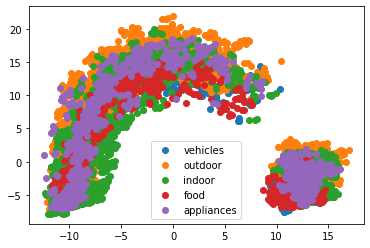

In [7]:
pca = PCA(2)
scaler = preprocessing.StandardScaler().fit(X)
X_2dim = pca.fit_transform(scaler.transform(X))

for l in df['target domain'].unique():
    plt.scatter(X_2dim[Y == l, 0], X_2dim[Y == l, 1], label=l)
plt.legend()
plt.show()

### Predict target domain from adapted hidden representation

In [ ]:
for step in np.arange(N_STEPS):

    print(f'Step {step}')

    X, Y = [], []

    for _, row in df.iterrows():
        X.append(eval(row[f'adapted h0 s{step}']))
        Y.append(row['target domain'])

    X, Y = np.array(X), np.array(Y)

    print(train_and_classify(X, Y, CLF_TYPE))

    pca = PCA(2)
    scaler = preprocessing.StandardScaler().fit(X)
    X_2dim = pca.fit_transform(scaler.transform(X))

    for l in df['target domain'].unique():
        plt.scatter(X_2dim[Y == l, 0], X_2dim[Y == l, 1], label=l)
    plt.legend()
    plt.show()

Step 0


### Predict listener domain from adapted hidden representation

In [ ]:
for step in np.arange(N_STEPS):

    print(f'Step {step}')

    X, Y = [], []
    for _, row in df.iterrows():
        X.append(eval(row[f'adapted h0 s{step}']))
        Y.append(row['listener domain'])

    X, Y = np.array(X), np.array(Y)

    print(train_and_classify(X, Y, CLF_TYPE))

### Predict listener domain from difference between adapted and non-adapted hidden representation

In [ ]:
for step in np.arange(N_STEPS):

    print(f'Step {step}')

    X, Y = [], []
    for _, row in df.iterrows():
        X.append(np.array(eval(row[f'adapted h0 s{step}'])) - np.array(eval(row['original h0'])))
        Y.append(row['listener domain'])

    X, Y = np.array(X), np.array(Y)

    print(train_and_classify(X, Y, CLF_TYPE))

## Diagnostic clustering

In [ ]:
def cluster_and_plot(X, Y, k=5):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    Y_pred = kmeans.labels_
    # print(Y)

    print(f'Adjusted rand score: {adjusted_rand_score(Y_pred, Y)}')

    pca = PCA(2)
    X_2dim = pca.fit_transform(X)
    labels = np.unique(Y_pred)

    for i in labels:
        plt.scatter(X_2dim[Y_pred == i, 0], X_2dim[Y_pred == i, 1], label=i)
    plt.legend()
    plt.show()

    return kmeans, plt

### Cluster non-adapted hidden representations (vs. target domains)

In [ ]:
X, Y = [], []

for _, row in df.iterrows():
    X.append(eval(row['original h0']))
    Y.append(row['target domain'])

X, Y = np.array(X), np.array(Y)

cluster_and_plot(X, Y)

### Cluster adapted hidden representations (vs. target domains)



In [ ]:
for step in np.arange(N_STEPS):

    print(f'Step {step}')

    X, Y = [], []

    for _, row in df.iterrows():
        X.append(eval(row[f'adapted h0 s{step}']))
        Y.append(row['target domain'])

    X, Y = np.array(X), np.array(Y)

    cluster_and_plot(X, Y)

### Cluster adapted hidden representations (vs. listener domains)


In [ ]:
for step in np.arange(N_STEPS):

    print(f'Step {step}')

    X, Y = [], []

    for _, row in df.iterrows():
        X.append(eval(row[f'adapted h0 s{step}']))
        Y.append(row['listener domain'])

    X, Y = np.array(X), np.array(Y)

    cluster_and_plot(X, Y)

### Cluster difference between adapted and non-adapted hidden representations (vs. listener domains)


In [ ]:
for step in np.arange(N_STEPS):

    print(f'Step {step}')

    X, Y = [], []

    for _, row in df.iterrows():
        X.append(np.array(eval(row[f'adapted h0 s{step}'])) - np.array(eval(row['original h0'])))
        Y.append(row['listener domain'])

    X, Y = np.array(X), np.array(Y)

    cluster_and_plot(X, Y)